In [1]:
import pandas as pd
import numpy as np
import sys
import psycopg2
from dotenv import load_dotenv
import os
import json
import string
import re
import phonenumbers


In [2]:
with open('C:\\Users\\shaya\\Desktop\\DaanMatch\\webscrape\\shayanNGOIndia\\NGOIndiascraper\\NGOIndiascraper\\ngosIndia_spider.json') as f:
    data = json.load(f)

In [3]:
ngoIndia = pd.read_json(json.dumps(data))


In [4]:
# Initialize empty dictionaries to hold the column values
columns = {
    'Add': [],
    'Pin': [],
    'Contact Person': [],
    'Purpose': [],
    'Aim/Objective/Mission': [],
    'Website': [],
    'Tel': [],
    'Mobile': [],
    'Email': []
}

In [5]:
# Loop through each row of the 'data' column and extract the values
for row in ngoIndia['data']:
    # Initialize empty dictionaries to hold the values for this row
    values = {
        'Add': '',
        'Pin': '',
        'Contact Person': '',
        'Purpose': '',
        'Aim/Objective/Mission': '',
        'Website': '',
        'Tel': '',
        'Mobile': '',
        'Email': ''
    }
    # Split each element of the 'data' list on the colon (':') character
    for item in row:
        tokens = item.split(':')
        if len(tokens) == 2:
            # If the split resulted in two tokens, use them to populate the appropriate column
            key = tokens[0].strip()
            value = tokens[1].strip()
            if key in columns:
                values[key] = value
    # Append extracted values to appropriate column lists
    for key, value in values.items():
        columns[key].append(value)

In [6]:
# Create a DataFrame from the extracted column values
ngoIndiaData = pd.DataFrame(columns)

In [7]:
ngoIndiaData.head(20)

,Add,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Tel,Mobile,Email
0,"A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation.,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com
1,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development.","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com
2,"Athal, Sindurfalia",,Hiren Patel,Social Work.,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com
3,"Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in
4,"2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com
5,"Bacharwar, Pendra",,Ravi,social work,"Tribal chid ko age badana, teaching & computer...",,,70495 66116,raviraj.rb58@gmail.com
6,Gopeshwar,,,"Poor Children Education, Women Development.",Education for children and women development a...,,,91-98973 23084,vijjy29@rediffmail.com
7,"Shri Ram Colony, Beladula, Behind Stadium",496001,Sharad Dewangan,,Integrated development.,,91-776-2225639,91-94252 75010,yuva_anjula@yahoo.in
8,"B-15, Acharya Niketan, Mayur Vihar Phase-I",,Nikesh Kumar,"Awareness Generation, Child Welfare, Corporate...",Develop cost effective road safety programs to...,www.carengo.org,011-42610286,98184 44486,care.scoiety7@fmail.com
9,,110001,? Subhra Chakravarty,,,,,,csirhq@sirnetd.ernet.in


In [8]:
ngoIndiaData.shape

(18423, 9)

In [9]:
##ngoIndiaData.to_csv('ngoIndiaData.csv', index=True)


**TESTING CODE, NOT USED IN IMPLEMENTATION**

In [10]:
##Testing on a copy of ngoindiadata
ngoIndiaData_copy2 = ngoIndiaData.copy()
ngoIndiaData_copy2['Tel'] = ngoIndiaData_copy2['Tel'].astype(str)
ngoIndiaData_copy2['Mobile'] = ngoIndiaData_copy2['Mobile'].astype(str)

In [11]:
ngoIndiaData_copy2.head()

,Add,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Tel,Mobile,Email
0,"A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation.,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com
1,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development.","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com
2,"Athal, Sindurfalia",,Hiren Patel,Social Work.,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com
3,"Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in
4,"2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com


In [12]:
ngoIndiaData.head()

,Add,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Tel,Mobile,Email
0,"A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation.,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com
1,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development.","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com
2,"Athal, Sindurfalia",,Hiren Patel,Social Work.,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com
3,"Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in
4,"2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com


In [13]:
ngoIndiaData['Contact Person'].unique()

array(['Ratul Kalita', 'Nabam Vivek', 'Hiren Patel', ...,
       'Jacob Roy Kuriakose', 'Babu John', 'Sojan K Varghese'],
      dtype=object)

Removing punctuation from purpose and contact person

In [14]:
ngoIndiaData['Purpose'] = ngoIndiaData['Purpose'].str.replace('[^\w\s,]', '')

ngoIndiaData['Contact Person'] = ngoIndiaData['Contact Person'].str.replace('[^\w\s\.]', '')



C:\Users\shaya\AppData\Local\Temp\ipykernel_4208\981697469.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ngoIndiaData['Purpose'] = ngoIndiaData['Purpose'].str.replace('[^\w\s,]', '')
C:\Users\shaya\AppData\Local\Temp\ipykernel_4208\981697469.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ngoIndiaData['Contact Person'] = ngoIndiaData['Contact Person'].str.replace('[^\w\s\.]', '')


In [15]:
ngoIndiaData.head()

,Add,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Tel,Mobile,Email
0,"A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com
1,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com
2,"Athal, Sindurfalia",,Hiren Patel,Social Work,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com
3,"Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in
4,"2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com


Removing punctuation from Tel and Mobile column expect dashes and commas.

In [16]:
# Define the punctuation to remove
punct = string.punctuation.replace('-', '').replace(',', '')

# Remove punctuation from Tel and Mobile columns
ngoIndiaData['Tel'] = ngoIndiaData['Tel'].str.replace('[{}]'.format(punct), '')
ngoIndiaData['Mobile'] = ngoIndiaData['Mobile'].str.replace('[{}]'.format(punct), '')

# Rename Tel column to Telephone Number
ngoIndiaData = ngoIndiaData.rename(columns={'Tel': 'Telephone Number'})

C:\Users\shaya\AppData\Local\Temp\ipykernel_4208\3739964943.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ngoIndiaData['Tel'] = ngoIndiaData['Tel'].str.replace('[{}]'.format(punct), '')
C:\Users\shaya\AppData\Local\Temp\ipykernel_4208\3739964943.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ngoIndiaData['Mobile'] = ngoIndiaData['Mobile'].str.replace('[{}]'.format(punct), '')


Removing puncutations and weird characters from aim column

In [17]:
# define a function to clean the text
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s,.]', '', text) # keep letters, numbers, commas, and periods
    return cleaned_text

# apply the function to the 'Aim/Objective/Mission' column
ngoIndiaData['Aim/Objective/Mission'] = ngoIndiaData['Aim/Objective/Mission'].apply(clean_text)

Renaming Add to Address

In [18]:
ngoIndiaData = ngoIndiaData.rename(columns={'Add': 'Address'})

In [21]:
ngoIndiaData.shape

(18423, 9)

In [20]:
##ngoIndiaData.to_csv('ngoIndiaDataClean.csv', index=False)

In [22]:
unique_counts = ngoIndiaData.nunique()
print(unique_counts)

Address                   7036
Pin                       4910
Contact Person           16475
Purpose                  11261
Aim/Objective/Mission     6489
Website                   1630
Telephone Number          3222
Mobile                   11650
Email                    16843
dtype: int64


In [23]:
ngoIndiaData.shape

(18423, 9)

In [24]:
##some cleaning ideas, check if email and mobile numbers are legitimate
## more text analysis, using schedule vii india code to
## reverse geocoding for mapping addresses.

In [25]:
with open('ngoIndiaNames.json') as f:
    names = json.load(f)

# create a list of NGO names from the JSON file
ngo_names = [name['name'][0] for name in names]

# add NGO Name column to ngoIndiaData
ngoIndiaData = ngoIndiaData.assign(**{'NGO Name': ngo_names})

In [26]:
ngoIndiaData.insert(0, 'NGO Name', ngoIndiaData.pop('NGO Name'))


In [27]:
ngoIndiaData.head()

,NGO Name,Address,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Telephone Number,Mobile,Email
0,"Himachal Educated Un-Employed Youth Society, S...","A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com
1,Him Aishwary Gramin Udyog Avam Laghu Bhachat K...,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com
2,"Heaven On Earth NGO, Manali","Athal, Sindurfalia",,Hiren Patel,Social Work,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com
3,"High-Tech Education & Welfare Society, Chamba","Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in
4,"Himachal Gram Jan Sansadhan Vikas Samiti, Kullu","2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com


In [28]:
with open('ngoIndiaWebsites.json', 'r') as f:
    ngo_websites = json.load(f)

# Create a new column in the dataframe
ngoIndiaData['Source URL'] = [x['website'][14:-2] for x in ngo_websites]

In [29]:
ngoIndiaData.head()

,NGO Name,Address,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Telephone Number,Mobile,Email,Source URL
0,"Himachal Educated Un-Employed Youth Society, S...","A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com,200 https://ngosindia.org/tripura-ngos/shaba-b...
1,Him Aishwary Gramin Udyog Avam Laghu Bhachat K...,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com,200 https://ngosindia.org/tripura-ngos/self-re...
2,"Heaven On Earth NGO, Manali","Athal, Sindurfalia",,Hiren Patel,Social Work,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com,200 https://ngosindia.org/tripura-ngos/shakti-...
3,"High-Tech Education & Welfare Society, Chamba","Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in,200 https://ngosindia.org/tripura-ngos/samadri...
4,"Himachal Gram Jan Sansadhan Vikas Samiti, Kullu","2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com,200 https://ngosindia.org/tripura-ngos/rega-pe...


In [30]:
## getting rid of the '200' at the beginning of the entries, leaving just the actual URL
ngoIndiaData['Source URL'] = ngoIndiaData['Source URL'].apply(lambda x: x.split(' ', 1)[1])


In [58]:
ngoIndiaData.head()

,NGO Name,Address,Pin,Contact Person,Purpose,Aim/Objective/Mission,Website,Telephone Number,Mobile,Email,Source URL
0,"Himachal Educated Un-Employed Youth Society, S...","A-364-A, Palam Vihar",122017,Ratul Kalita,Education and innovation,To promote innovation in the field of educatio...,,,91-99711 89606,3eifoundation@gmail.com,https://ngosindia.org/tripura-ngos/shaba-brata...
1,Him Aishwary Gramin Udyog Avam Laghu Bhachat K...,"First Floor, Takar Complex",791110,Nabam Vivek,"Health, education, economic development","Home, health, education and happiness for all.",,,91-94360 50999,mywisdom@rocketmail.com,https://ngosindia.org/tripura-ngos/self-relian...
2,"Heaven On Earth NGO, Manali","Athal, Sindurfalia",,Hiren Patel,Social Work,"Working for tribal development, tribal culture...",,,80005 20053,sankalp.foundation04@gmail.com,https://ngosindia.org/tripura-ngos/shakti-mata...
3,"High-Tech Education & Welfare Society, Chamba","Green Land Campus, Kargil",194103,M. Yasin Hor,,Sustainable development through peoples partic...,,91-1985-232378,,yasinhor@aol.in,https://ngosindia.org/tripura-ngos/samadrita-a...
4,"Himachal Gram Jan Sansadhan Vikas Samiti, Kullu","2nd Floor, Toor Niwas, Rgt Road",,P. Sulochana,Social Work,"Yuvasakthi, an initiative of a bunch of youth ...",www.yuvasakthi.org,03192-241607,99332 88131,yuvasakthiandamans@gmail.com,https://ngosindia.org/tripura-ngos/rega-pechar...


In [88]:
# Define a regular expression pattern for email validation
email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"

# Define a function to check if a given email is valid
def is_valid_email(email):
    return int(bool(re.match(email_pattern, email)))

# Apply the function to the 'email' column of the DataFrame and create a new column 'is_valid_email'
ngoIndiaData['is_valid_email'] = ngoIndiaData['Email'].apply(is_valid_email)

# Count the number of total emails
num_total_emails = len(ngoIndiaData['Email'])

# Print the number of total emails
print(f"Number of total emails: {num_total_emails}")

# Count the number of invalid emails
num_invalid_emails = sum(ngoIndiaData['is_valid_email'] == False)

# Print the number of invalid emails
print(f"Number of invalid emails: {num_invalid_emails}")
# Check the percentage of valid emails
print(f"Percentage of valid emails: {sum(ngoIndiaData['is_valid_email']) / len(ngoIndiaData) * 100}%")

Number of total emails: 18423
Number of invalid emails: 1187
Percentage of valid emails: 93.5569668349346%


In [46]:
# Select the rows where 'is_valid_email' is False
invalid_emails = ngoIndiaData.loc[ngoIndiaData['is_valid_email'] == False, 'Email']

# View the invalid emails as a pandas Series object
print(invalid_emails)

Series([], Name: Email, dtype: object)


Not sure if below code works

In [52]:

# Define a function to check if a phone number is valid
def is_valid_phone_number(phone_number):
    try:
        parsed_phone_number = phonenumbers.parse(phone_number, "IN")
        return phonenumbers.is_valid_number(parsed_phone_number)
    except phonenumbers.phonenumberutil.NumberParseException:
        return False

# Create boolean masks for the non-missing/non-empty values in each column
valid_telephone_mask = ngoIndiaData['Telephone Number'].notna()
valid_mobile_mask = ngoIndiaData['Mobile'].notna()

# Check if the non-missing/non-empty values in the 'Telephone Number' column are valid
telephone_numbers = ngoIndiaData.loc[valid_telephone_mask, 'Telephone Number'].astype(str)
is_valid_telephone = telephone_numbers.apply(is_valid_phone_number)

# Check if the non-missing/non-empty values in the 'Mobile' column are valid
mobile_numbers = ngoIndiaData.loc[valid_mobile_mask, 'Mobile'].astype(str)
is_valid_mobile = mobile_numbers.apply(is_valid_phone_number)

# Print the percentage of valid phone numbers in each column
print(f"Valid Telephone Number: {100 * is_valid_telephone.mean():.2f}%")
print(f"Valid Mobile: {100 * is_valid_mobile.mean():.2f}%")


Valid Telephone Number: 15.79%
Valid Mobile: 59.51%


Schedule Vii of India, want to use this to match Purpose's of NGO's to each code.

In [32]:
'''
##Raw text for Schedule Vii
schedule_vii_codes = {
    'i': 'eradicating hunger, poverty and malnutrition, promoting health care including preventive health and sanitation and making available safe drinking water',
    'ii': 'promoting education, including special education and employment enhancing vocation skills especially among children, women, elderly, and the differently abled and livelihood enhancement projects',
    'iii': 'promoting gender equality, empowering women, setting up homes and hostels for women and orphans; setting up old age homes, day care centres and such other facilities for senior citizens and measures for reducing inequalities faced by socially and economically backward groups',
    'iv': 'ensuring environmental sustainability, ecological balance, protection of flora and fauna, animal welfare, agroforestry, conservation of natural resources and maintaining quality of soil, air and water',
    'v': 'protection of national heritage, art and culture including restoration of buildings and sites of historical importance and works of art; setting up public libraries; promotion and development of traditional arts and handicrafts',
    'vi': 'measures for the benefit of armed forces veterans, war widows and their dependents, Central Armed Police Forces (CAPE) and Central Para Military Forces (CPMF) veterans, and their dependents including windows',
    'vii': 'training to promote rural sports, nationally recognised sports, paralympic sports and Olympic sports',
    'viii': 'contribution to the Prime Minister\'s National Relief Fund or Prime Minister’s Citizen Assistance and Relief in Emergency Situations Fund (PM CARES Fund) or any other fund set up by the Central Government for socio-economic development and relief and welfare of the Scheduled Castes, the Scheduled Tribes, other backward classes, minorities and women',
    'ix': 'Contribution to incubators or research and development projects in the field of science, technology, engineering and medicine, funded by Central Government or State Government or Public Sector Undertaking or any agency of the Central Government or State Government; and Contributions to public funded Universities; Indian Institute of Technology (IITs); National Laboratories and autonomous bodies established under Department of Atomic Energy (DAE); Department of Biotechnology (DBT); Department of Science and Technology (DST); Department of Pharmaceuticals; Ministry of Ayurveda, Yoga and Naturopathy, Unani, Siddha and Homoeopathy (AYUSH); Ministry of Electronics and Information Technology and other bodies, namely Defense Research and Development Organisation (DRDO); Indian Council of Agricultural Research (ICAR); Indian Council of Medical Research (ICMR) and Council of Scientific and Industrial Research (CSIR), engaged in conducting research in science, technology, engineering and medicine aimed at promoting Sustainable Development Goals (SDGs)',
    'x': 'rural development projects',
    'xi': 'slum are development. For the purposes of this item, the term ‘slum area’ shall mean any area declared as such by the Central Government or any State Government or any other competent authority under any law for the time being in force.',
    'xii': 'disaster management, including relief, rehabilitation and reconstruction activities.'
}
'''
schedule_vii_codes = {
    'i': 'eradicating hunger poverty malnutrition promoting health care preventive health sanitation safe drinking water',
    'ii': 'promoting education special education employment enhancing vocation skills children women elderly differently abled livelihood enhancement projects',
    'iii': 'promoting gender equality empowering women setting homes hostels women orphans setting old age homes day care centres facilities senior citizens reducing inequalities socially economically backward groups',
    'iv': 'ensuring environmental sustainability ecological balance protection flora fauna animal welfare agroforestry conservation natural resources maintaining quality soil air water',
    'v': 'protection national heritage art culture restoration buildings sites historical importance works art setting public libraries promotion development traditional arts handicrafts',
    'vi': 'measures benefit armed forces veterans war widows dependents Central Armed Police Forces CAPE Central Para Military Forces CPMF veterans dependents windows',
    'vii': 'training promote rural sports nationally recognised sports paralympic sports Olympic sports',
    'viii': 'contribution Prime Minister National Relief Fund Prime Minister’s Citizen Assistance Relief Emergency Situations Fund PM CARES Fund fund Central Government socio-economic development relief welfare Scheduled Castes Scheduled Tribes backward classes minorities women',
    'ix': 'Contribution incubators research development projects field science technology engineering medicine funded Central Government State Government Public Sector Undertaking agency Central Government State Government Contributions public funded Universities Indian Institute Technology IITs National Laboratories autonomous bodies established Department Atomic Energy DAE Department Biotechnology DBT Department Science Technology DST Department Pharmaceuticals Ministry Ayurveda Yoga Naturopathy Unani Siddha Homoeopathy AYUSH Ministry Electronics Information Technology bodies Defense Research Development Organisation DRDO Indian Council Agricultural Research ICAR Indian Council Medical Research ICMR Council Scientific Industrial Research CSIR engaged conducting research science technology engineering medicine aimed promoting Sustainable Development Goals SDGs',
    'x': 'rural development projects',
    'xi': 'slum development purposes item term slum area shall mean area declared Central Government State Government competent authority law time force',
    'xii': 'disaster management relief rehabilitation reconstruction activities'
}


Geopandas issues with merging the geodataFrame and getting locaitons of the NGOs through the PINs. Not sure how to
fix.

In [62]:
'''
import geopandas as gpd

# Read in state boundaries from a GeoPackage file
indiaGeo = gpd.read_file("C:\\Users\\shaya\\Desktop\\DaanMatch\\webscrape\\shayanNGOIndia\\NGOIndiascraper\\NGOIndiascraper\\gadm36_IND.gpkg")
'''


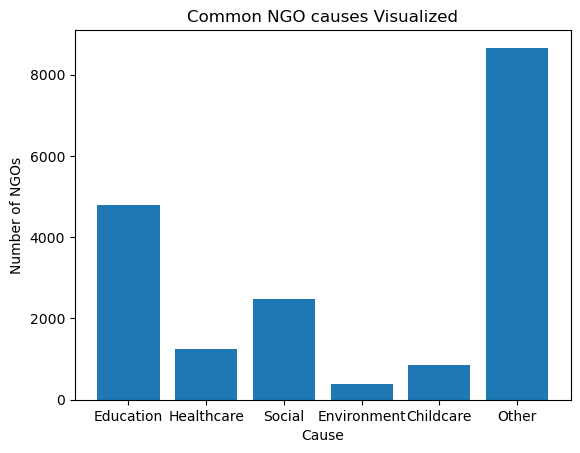

In [87]:
# define the list of top 5 causes
top_causes = ['Education', 'Healthcare', 'Social', 'Environment', 'Childcare', 'Other']

# create a dictionary to count NGOs for each cause
cause_counts = {}
for cause in top_causes:
    cause_counts[cause] = 0

# iterate over the Purpose column and count NGOs for each cause
for purpose in ngoIndiaData['Purpose']:
    purpose_lower = purpose.lower()
    if 'education' in purpose_lower:
        cause_counts['Education'] += 1
    elif 'health' in purpose_lower:
        cause_counts['Healthcare'] += 1
    elif 'social' in purpose_lower:
        cause_counts['Social'] += 1
    elif 'environment' in purpose_lower:
        cause_counts['Environment'] += 1
    elif 'child' in purpose_lower:
        cause_counts['Childcare'] += 1
    else:
        cause_counts['Other'] += 1

# create a bar chart to visualize the top 5 causes
import matplotlib.pyplot as plt

plt.bar(range(len(cause_counts)), list(cause_counts.values()), align='center')
plt.xticks(range(len(cause_counts)), list(cause_counts.keys()))
plt.title('Common NGO causes Visualized')
plt.xlabel('Cause')
plt.ylabel('Number of NGOs')
plt.show()


Created this visualization to see how many NGOs in this data frame fall under some common causes pursued by NGOs.
Other column is very large because it represents all of the data entries that didn't include the words that I searched for in 'top_causes'. This is a flaw of the visualization.

In [91]:
##ngoIndiaData.to_csv('ngoIndiaDataClean.csv', index=False)